<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_4_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [17]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

In [19]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


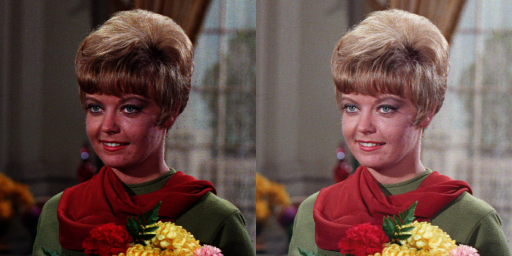

In [23]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gammaInput = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(img, gamma=gammaInput)
cv2_imshow(np.hstack([img, adjusted]))